In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [2]:
df = pd.read_csv('/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
dummies = ['Sex','BP','Cholesterol']
dummies_data = pd.get_dummies(df[dummies])
dummies_data

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
195,1,0,0,1,0,1,0
196,0,1,0,1,0,1,0
197,0,1,0,0,1,1,0
198,0,1,0,0,1,0,1


In [4]:
prepare_data = pd.concat([df,dummies_data],axis = 1)
prepare_data.drop(dummies,axis=1,inplace=True)
prepare_data

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


In [5]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib as plt

In [6]:
x = prepare_data.drop(['Age','Drug','Na_to_K'],axis=1).values
y = prepare_data['Drug'].values

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33,random_state=42)

In [8]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(x_train, y_train)

In [9]:
y_pred_gini = clf_gini.predict(x_test)

In [10]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5152


[Text(196.51304347826087, 195.696, 'X[2] <= 0.5\ngini = 0.692\nsamples = 134\nvalue = [15, 12, 10, 35, 62]'),
 Text(116.45217391304348, 152.208, 'X[3] <= 0.5\ngini = 0.601\nsamples = 81\nvalue = [0, 0, 10, 35, 36]'),
 Text(58.22608695652174, 108.72, 'X[6] <= 0.5\ngini = 0.485\nsamples = 41\nvalue = [0, 0, 0, 24, 17]'),
 Text(29.11304347826087, 65.232, 'X[0] <= 0.5\ngini = 0.499\nsamples = 29\nvalue = [0, 0, 0, 15, 14]'),
 Text(14.556521739130435, 21.744, 'gini = 0.498\nsamples = 15\nvalue = [0, 0, 0, 7, 8]'),
 Text(43.66956521739131, 21.744, 'gini = 0.49\nsamples = 14\nvalue = [0, 0, 0, 8, 6]'),
 Text(87.33913043478262, 65.232, 'X[0] <= 0.5\ngini = 0.375\nsamples = 12\nvalue = [0, 0, 0, 9, 3]'),
 Text(72.78260869565217, 21.744, 'gini = 0.245\nsamples = 7\nvalue = [0, 0, 0, 6, 1]'),
 Text(101.89565217391305, 21.744, 'gini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 2]'),
 Text(174.67826086956524, 108.72, 'X[5] <= 0.5\ngini = 0.636\nsamples = 40\nvalue = [0, 0, 10, 11, 19]'),
 Text(145.565

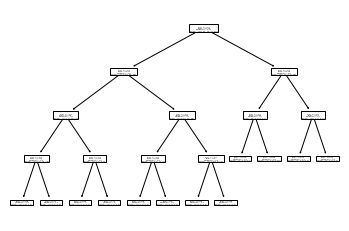

In [11]:
tree.plot_tree(clf_gini)

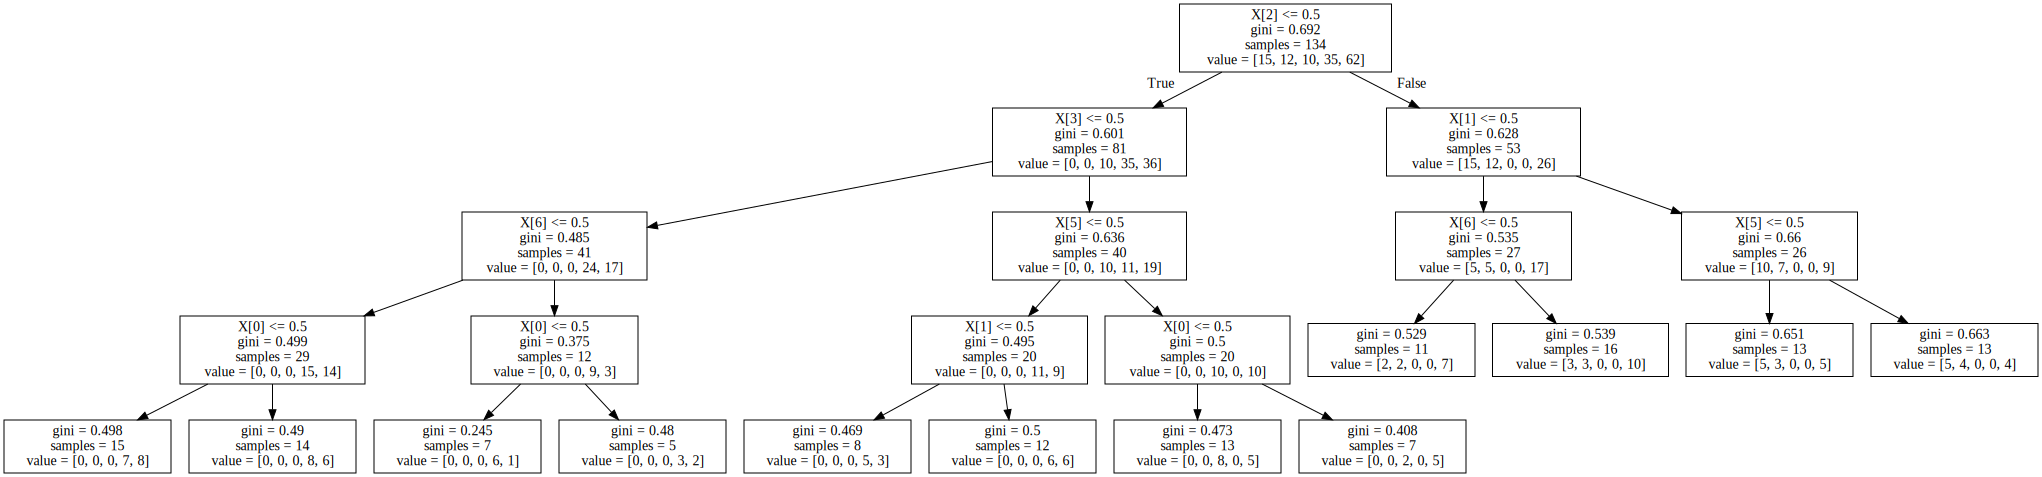

In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Drug") 
graph